In [157]:
import numpy as np
from matplotlib import pyplot as plt
from utils import calculate_awgn_ser_with_qam, calculate_awgn_ber_with_16qam


plt.rcParams.update({"font.size": 14})

In [141]:
def calculate_16qam_ber(dbms, offset: float):
    return calculate_awgn_ser_with_qam(16, dbms + offset) / 4

In [191]:
# dbms = np.arange(-25, -18)
dbms = np.arange(-33, -26)

run1 = [-1.83, -1.96, -2.02, -2.16, -2.32, -2.30, -2.30]

run2 = [-1.74, -1.82, -2.00, -2.20, -2.25, -2.26, -2.45]

simulation = np.log10(
    [
        0.019711223151336284,
        0.012937571733070995,
        0.008828291523200525,
        0.005841121495327103,
        0.0036583866207575014,
        0.002910313166092802,
        0.0020546401049352354,
    ]
)

In [150]:
offsets = np.linspace(27, 32)
costs = np.zeros_like(offsets)
for i, offset in enumerate(offsets):
    pred = np.log10(calculate_16qam_ber(dbms, offset)[:4])
    cost = np.sum(np.square(run1[:4] - pred))
    cost += np.sum(np.square(run2[:4] - pred))
    costs[i] = cost

In [153]:
# +29.45, given a sensitivity of -23.30 dBm @ 10^-2 BER, this gives SNR = 6.15 dB
# at 10^-2 BER
offsets[np.argmin(costs)]

29.448979591836736

In [165]:
round(calculate_awgn_ber_with_16qam(6.15), 3)

0.01

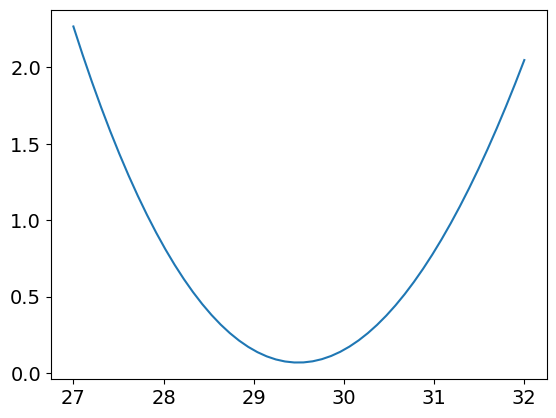

In [166]:
plt.plot(offsets, costs)
plt.show()

In [186]:
offsets = np.linspace(35, 40)
costs = np.zeros_like(offsets)
for i, offset in enumerate(offsets):
    pred = np.log10(calculate_16qam_ber(np.arange(-33, -28), offset))
    cost = np.sum(np.square(simulation[:5] - pred))
    costs[i] = cost

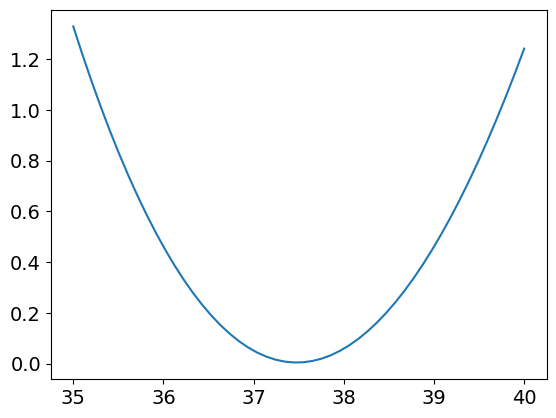

In [188]:
plt.plot(offsets, costs)
plt.show()

In [190]:
# Predicted sensitivity is basically EXACTLY 8 dB off.
offsets[np.argmin(costs)]

37.44897959183673

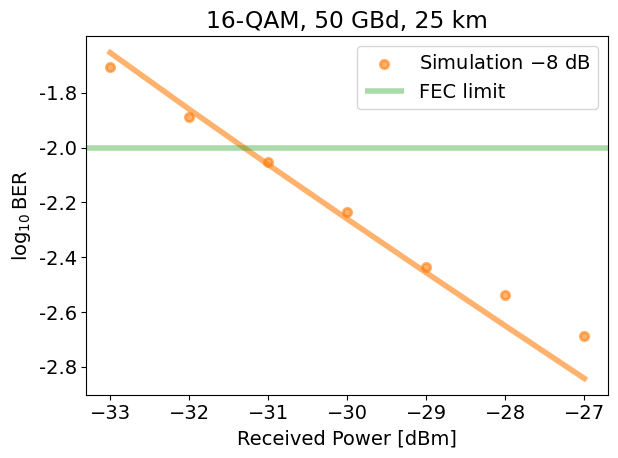

In [193]:
fig, ax = plt.subplots()

# ax.plot(
# dbms, np.log10(calculate_16qam_ber(dbms, 29.45)), alpha=0.6, linewidth=4, color="C0"
# )

ax.plot(
    dbms, np.log10(calculate_16qam_ber(dbms, 37.45)), alpha=0.6, linewidth=4, color="C1"
)

# ax.scatter(dbms, run1, alpha=0.6, linewidth=2, color="C0", label="Experiment")
# ax.scatter(dbms, run2, alpha=0.6, linewidth=2, color="C0")
ax.scatter(
    dbms, simulation, alpha=0.6, linewidth=2, color="C1", label="Simulation $-8$ dB"
)

orig_lims = ax.get_xlim()
ax.hlines(-2, *orig_lims, label="FEC limit", color="C2", alpha=0.4, linewidth=4)
ax.set_xlim(orig_lims)

# Measured sensitivity is -23.3 dBm.
# ax.vlines(-23.30, -2.1, -1.9)

ax.set_xlabel("Received Power [dBm]")
ax.set_ylabel(r"$\log_{10}$BER")

# BER should be a straight line on a semi-log plot.
# ax.set_yscale("symlog", linthresh=0.0001)
yticks = np.arange(-2.8, -1.6, 0.2)
ax.set_yticks(yticks)
ax.set_yticklabels(map("{:.1f}".format, yticks))

ax.legend()
ax.set_title("16-QAM, 50 GBd, 25 km")

fig.tight_layout()

# plt.savefig("results_sim.pdf")

plt.show()

In [4]:
mus = np.arange(5, 12)
bers = np.array(
    [
        8.751e-03,  # 0.05
        8.726e-03,  # 0.06
        8.685e-03,  # 0.07
        8.659e-03,  # 0.08
        8.678e-03,  # 0.09
        8.730e-03,  # 0.10
        8.769e-03,  # 0.11
    ]
)

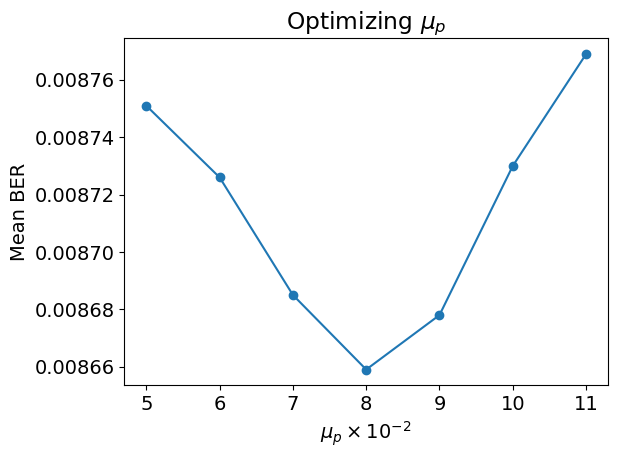

In [5]:
plt.plot(mus, bers, "o-")
plt.title(r"Optimizing $\mu_p$")
plt.ylabel("Mean BER")
plt.xlabel(r"$\mu_p \times 10^{-2}$")
plt.tight_layout()
# plt.savefig("results_optimal_mu_p.pdf")

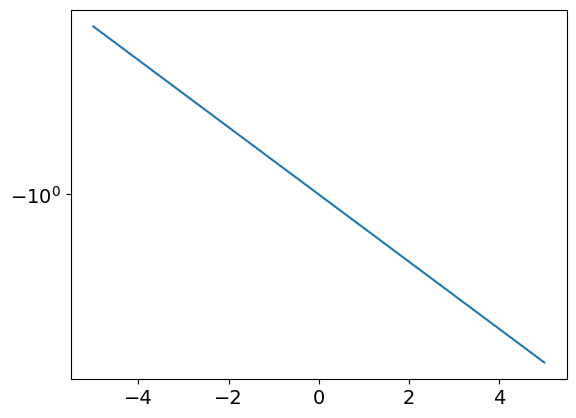

In [9]:
x = np.linspace(-5, 5)
y = -(10 ** (x / 10))
plt.plot(x, y)
plt.yscale("symlog", linthresh=0.1)
plt.show()